In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import seaborn as sns
import itertools
import gzip
import wordcloud
import datetime as dt
import pylab as pl

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


from textblob import TextBlob
from scipy.stats import ttest_ind
from string import punctuation
from collections import Counter
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to C:\Users\Danny
[nltk_data]     Arenson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
Sports_Outdoors = pd.read_json('Sports_and_Outdoors_5.json', lines=True)

In [40]:
Sports_Outdoors = Sports_Outdoors[['overall','summary']]

In [41]:
#creating a binary classifier for ratings
Sports_Outdoors["overall"] = Sports_Outdoors["overall"].apply(lambda x: '1' if x > 3 else '0')

In [42]:
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = string.maketrans(string.punctuation,' '*len(string.punctuation))
def preprocess (eachline):
    sentence = eachline.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    stop_words = (w for w in tokens if not w in stop)
    clean_words =(w for w in stop_words if not w.isnumeric())
    stemmed = [w for w in clean_words if lemmatizer.lemmatize(w)] 
    return ' '.join(stemmed)

In [43]:
cleaned_reviews = []
for w in Sports_Outdoors['summary']:
    cleaned_reviews.append(preprocess(w))

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()
Xtfidf=tfidfvectorizer.fit_transform(cleaned_reviews)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
XCV=CV.fit_transform(cleaned_reviews)

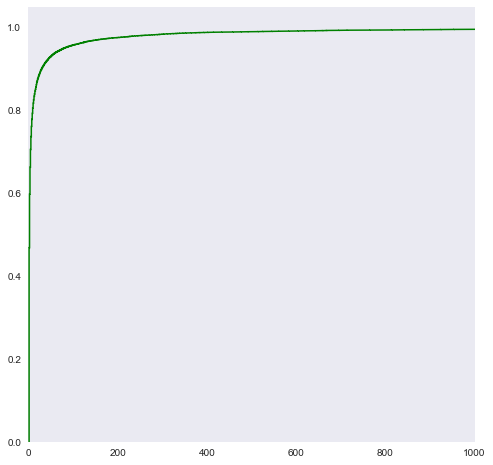

In [46]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
df = list((XCV > 0).sum(0).tolist()[0])
c = pd.Series(df)
y = np.arange(c.sum())
plt.hist(c,y,normed=1, histtype='step', color='g', cumulative=True, linewidth=1.5, )
plt.xlim(-1,1000)
plt.grid()

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer1 = TfidfVectorizer(min_df=5)
X_clean=tfidfvectorizer1.fit_transform(cleaned_reviews)
y_clean = (Sports_Outdoors.overall)

In [48]:
idf = tfidfvectorizer1.idf_
idf_score =(dict(zip(tfidfvectorizer1.get_feature_names(), idf)))

In [50]:
s = pd.DataFrame.from_dict(idf_score, orient='index')

In [51]:
s.columns = ['Score']

In [52]:
s.sort_values('Score', ascending=True).head(10)

,Score
great,2.762601
good,3.304132
nice,4.048878
works,4.088145
product,4.338318
price,4.379659
knife,4.502756
perfect,4.571277
quality,4.609438
well,4.620469


In [53]:
s.sort_values('Score', ascending=True).tail(10)

,Score
legacy,11.807497
operates,11.807497
guest,11.807497
shy,11.807497
wll,11.807497
snowboarding,11.807497
endless,11.807497
sipping,11.807497
shinny,11.807497
foul,11.807497


In [54]:
from sklearn.cross_validation import StratifiedKFold

In [55]:
kf = StratifiedKFold(y_clean,n_folds=5, shuffle=True)
for train, test in kf:
    X_train, X_test = X_clean[train], X_clean[test]
    y_train, y_test = y_clean[train], y_clean[test]

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237070, 7916), (59267, 7916), (237070L,), (59267L,))

In [57]:
from sklearn.decomposition import TruncatedSVD

In [58]:
svd = TruncatedSVD()
svd.fit(X_train)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [59]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
#SVM = svm.SVC(kernel='linear')
#SVM.fit(X1cl_train, y1cl_train)

In [60]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

### Bernoulli Naive Bayes

In [61]:
BNB = BernoulliNB(binarize=0.5)
BNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.5, class_prior=None, fit_prior=True)

In [62]:
print ('Accuracy of test data: ',(accuracy_score(BNB.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(BNB.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of BernoulliNB with alpha = 1.0:')
print(classification_report(BNB.predict(X_test), y_test))

('Accuracy of test data: ', 0.8748038537466043)
('Accuracy of training data: ', 0.8813810267009744)


Classification report summary of BernoulliNB with alpha = 1.0:
             precision    recall  f1-score   support

          0       0.32      0.64      0.43      4352
          1       0.97      0.89      0.93     54915

avg / total       0.92      0.87      0.89     59267



In [64]:
y_true_BNB = np.array(y_test).astype(int)
y_pred_BNB = np.array(BNB.predict(X_test)).astype(int)
BernoulliNB_auc = roc_auc_score(y_true_BNB, y_pred_BNB)
BernoulliNB_auc

0.64611793998906886

In [65]:
probas1_ = BNB.predict_proba(X_test)[:,1]

In [66]:
probas1_

array([ 0.93476602,  0.9914988 ,  0.99254984, ...,  0.97722297,
        0.82970043,  0.27708636])

In [67]:
fpr1,tpr1,_ = roc_curve(y_true_BNB, probas1_)

In [68]:
from sklearn.naive_bayes import MultinomialNB

### Multinomial Naive Bayes

In [70]:
clf1=MultinomialNB(alpha=0.1)
clf1.fit(X_train,y_train)
print ('Accuracy of test data: ',(accuracy_score(clf1.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(clf1.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of MultinomialDB with alpha = 0.01:')
print(classification_report(clf1.predict(X_test), y_test))

('Accuracy of test data: ', 0.88340897970202648)
('Accuracy of training data: ', 0.88733285527481331)


Classification report summary of MultinomialDB with alpha = 0.01:
             precision    recall  f1-score   support

          0       0.29      0.77      0.42      3194
          1       0.99      0.89      0.94     56073

avg / total       0.95      0.88      0.91     59267



In [71]:
y_true_MNB = np.array(y_test).astype(int)
y_pred_MNB = np.array(clf1.predict(X_test)).astype(int)
MultinomialNB_auc = roc_auc_score(y_true_MNB, y_pred_MNB)
MultinomialNB_auc

0.63566049719240991

In [72]:
probas2_ = clf1.predict_proba(X_test)[:,1]

In [73]:
fpr2,tpr2,_ = roc_curve(y_true_MNB, probas2_)

### Ada Boost

In [74]:
Ada=AdaBoostClassifier(n_estimators=300)
Ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)

In [75]:
print ('Accuracy of test data: ',(accuracy_score(Ada.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(Ada.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of AdaBoostClassifier:')
print(classification_report(Ada.predict(X_test), y_test))

('Accuracy of test data: ', 0.88335836131405332)
('Accuracy of training data: ', 0.88437592272324628)


Classification report summary of AdaBoostClassifier:
             precision    recall  f1-score   support

          0       0.31      0.74      0.44      3655
          1       0.98      0.89      0.93     55612

avg / total       0.94      0.88      0.90     59267



In [76]:
y_true_ABC = np.array(y_test).astype(int)
y_pred_ABC = np.array(Ada.predict(X_test)).astype(int)
AdaBoostClassifier_auc = roc_auc_score(y_true_ABC, y_pred_ABC)
AdaBoostClassifier_auc

0.64658374778563865

In [77]:
probas3_ = Ada.predict_proba(X_test)[:,1]

In [78]:
fpr3,tpr3,_ = roc_curve(y_true_ABC, probas3_)

In [79]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [80]:
logit=LogisticRegression(C=10)
logit.fit(X_train,y_train)
print ('Accuracy of test data: ',(accuracy_score(logit.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(logit.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of Logistic Regression C=1:')
print(classification_report(logit.predict(X_test), y_test))

('Accuracy of test data: ', 0.88539996962896717)
('Accuracy of training data: ', 0.89263508668325808)


Classification report summary of Logistic Regression C=1:
             precision    recall  f1-score   support

          0       0.37      0.70      0.49      4588
          1       0.97      0.90      0.94     54679

avg / total       0.93      0.89      0.90     59267



In [81]:
y_true_log = np.array(y_test).astype(int)
y_pred_log = np.array(logit.predict(X_test)).astype(int)
LogisticRegression_auc = roc_auc_score(y_true_log, y_pred_log)
LogisticRegression_auc

0.67298533198399224

In [82]:
probas4_ = logit.predict_proba(X_test)[:,1]

In [83]:
fpr4,tpr4,_ = roc_curve(y_true_log, probas4_)

### Decision Tree

In [84]:
dtree=DecisionTreeClassifier(max_depth=200, criterion='entropy')
dtree.fit(X_train,y_train)
print ('Accuracy of test data: ',(accuracy_score(dtree.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(dtree.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of Decision Tree:')
print(classification_report(dtree.predict(X_test), y_test))

('Accuracy of test data: ', 0.87642364216174262)
('Accuracy of training data: ', 0.92448643860463153)


Classification report summary of Decision Tree:
             precision    recall  f1-score   support

          0       0.34      0.65      0.45      4610
          1       0.97      0.90      0.93     54657

avg / total       0.92      0.88      0.89     59267



In [85]:
y_true_DTC = np.array(y_test).astype(int)
y_pred_DTC = np.array(dtree.predict(X_test)).astype(int)
DecisionTreeClassifier_auc = roc_auc_score(y_true_DTC, y_pred_DTC)
DecisionTreeClassifier_auc

0.65553227362404598

In [86]:
probas5_ = dtree.predict_proba(X_test)[:,1]

In [87]:
fpr5,tpr5,_ = roc_curve(y_true_DTC, probas5_)

### Random Forest

In [88]:
random=RandomForestClassifier(n_estimators=50)
random.fit(X_train,y_train)
print ('Accuracy of test data: ',(accuracy_score(random.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(random.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of RandomForest:')
print(classification_report(random.predict(X_test), y_test))

('Accuracy of test data: ', 0.88529873285302108)
('Accuracy of training data: ', 0.96153878601257015)


Classification report summary of RandomForest:
             precision    recall  f1-score   support

          0       0.39      0.69      0.50      4970
          1       0.97      0.90      0.94     54297

avg / total       0.92      0.89      0.90     59267



In [89]:
y_true_RFC = np.array(y_test).astype(int)
y_pred_RFC = np.array(random.predict(X_test)).astype(int)
RandomForrestClassifier_auc = roc_auc_score(y_true_RFC, y_pred_RFC)
RandomForrestClassifier_auc

0.68191794173714682

In [90]:
probas6_ = random.predict_proba(X_test)[:,1]

In [91]:
fpr6,tpr6,_ = roc_curve(y_true_RFC, probas6_)

In [92]:
from sklearn.linear_model import Perceptron

### Perceptron

In [93]:
per=Perceptron(n_iter=1000)
per.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=1000, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [94]:
print ('Accuracy of test data: ',(accuracy_score(per.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(per.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of Perceptron:')
print(classification_report(per.predict(X_test), y_test))

('Accuracy of test data: ', 0.83528776553562689)
('Accuracy of training data: ', 0.84367486396422997)


Classification report summary of Perceptron:
             precision    recall  f1-score   support

          0       0.46      0.44      0.45      9000
          1       0.90      0.91      0.90     50267

avg / total       0.83      0.84      0.83     59267



In [95]:
y_true_P = np.array(y_test).astype(int)
y_pred_P = np.array(per.predict(X_test)).astype(int)
Perceptron_auc = roc_auc_score(y_true_P, y_pred_P)
Perceptron_auc

0.67812411883324231

### ROC Curve

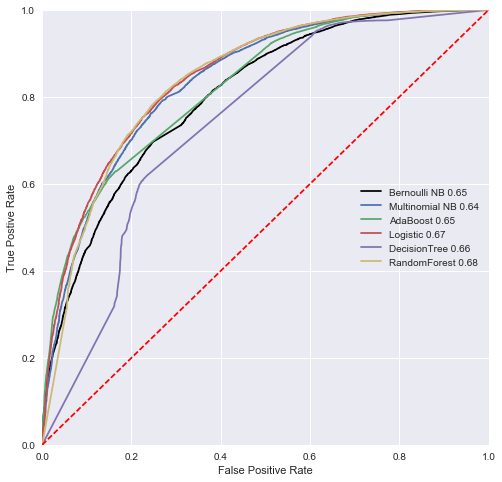

In [97]:
fig = plt.figure(figsize=(8,8))
plt.plot(fpr1,tpr1, label=('Bernoulli NB %.2f' %BernoulliNB_auc), color='k')
plt.plot(fpr2,tpr2, label=('Multinomial NB %.2f' %MultinomialNB_auc))
plt.plot(fpr3,tpr3, label=('AdaBoost %.2f' %AdaBoostClassifier_auc))
plt.plot(fpr4,tpr4, label=('Logistic %.2f' %LogisticRegression_auc))
plt.plot(fpr5,tpr5, label=('DecisionTree %.2f' %DecisionTreeClassifier_auc))
plt.plot(fpr6,tpr6, label=('RandomForest %.2f' %RandomForrestClassifier_auc))
plt.legend(loc='right')
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Postive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
from sklearn.metrics import precision_score, confusion_matrix
import itertools

### Confusion Matrix

In [99]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### BNB

Confusion matrix, without normalization
[[ 2798  5866]
 [ 1554 49049]]


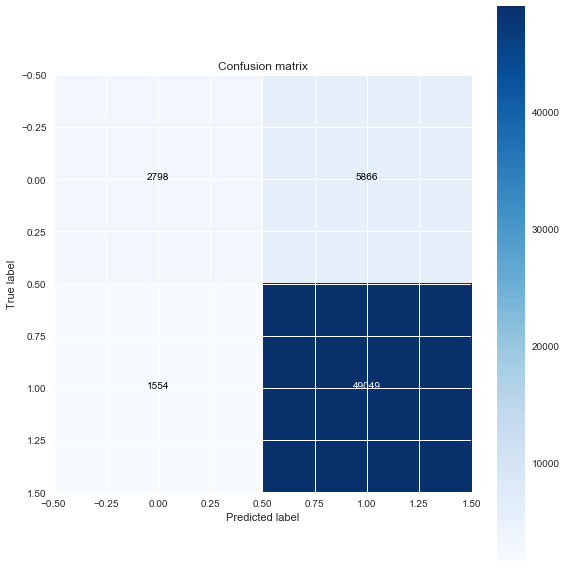

In [100]:
fig = plt.figure(figsize=(8,8))
cm1 = confusion_matrix(y_test, BNB.predict(X_test))
plot_confusion_matrix(cm1);

### MNB

Confusion matrix, without normalization
[[ 2474  6190]
 [  720 49883]]


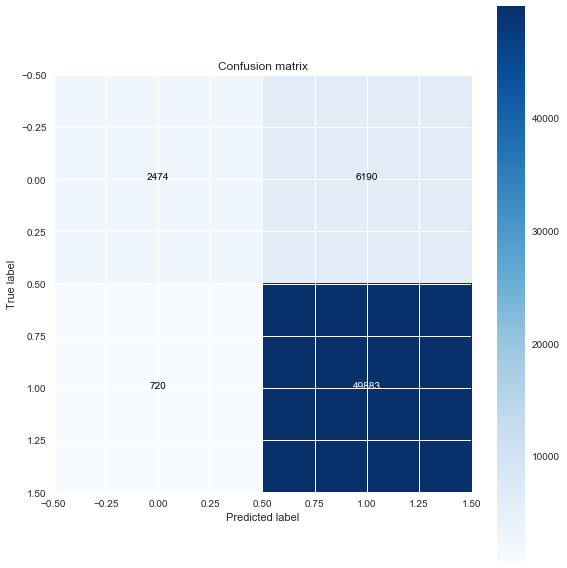

In [101]:
fig = plt.figure(figsize=(8,8))
cm2 = confusion_matrix(y_test, clf1.predict(X_test))
plot_confusion_matrix(cm2);

### Ada

Confusion matrix, without normalization
[[ 2703  5961]
 [  952 49651]]


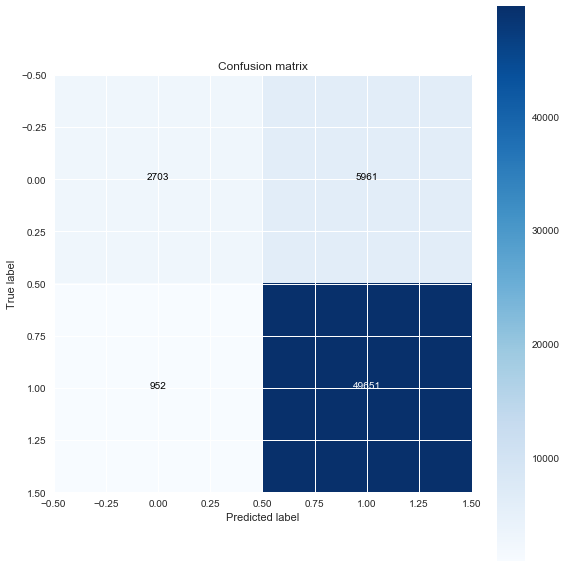

In [102]:
fig = plt.figure(figsize=(8,8))
cm3 = confusion_matrix(y_test, Ada.predict(X_test))
plot_confusion_matrix(cm3);

### Logistic Regression

Confusion matrix, without normalization
[[ 3230  5434]
 [ 1358 49245]]


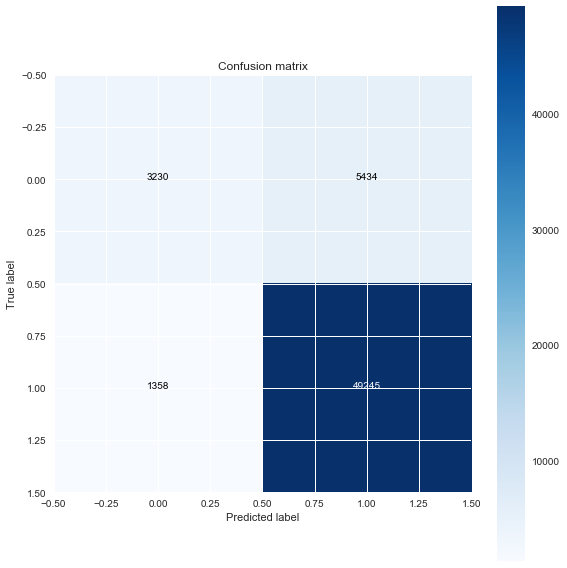

In [103]:
fig = plt.figure(figsize=(8,8))
cm4 = confusion_matrix(y_test, logit.predict(X_test))
plot_confusion_matrix(cm4);

### Decision Tree

Confusion matrix, without normalization
[[ 2975  5689]
 [ 1635 48968]]


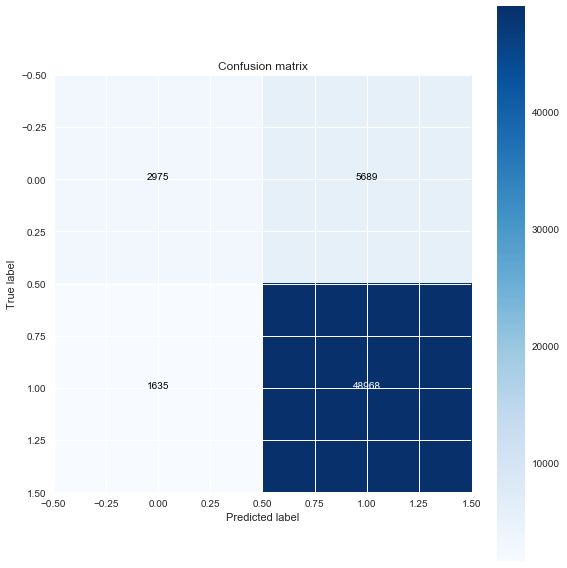

In [104]:
fig = plt.figure(figsize=(8,8))
cm5 = confusion_matrix(y_test, dtree.predict(X_test))
plot_confusion_matrix(cm5);

### Random Forest

Confusion matrix, without normalization
[[ 3418  5246]
 [ 1552 49051]]


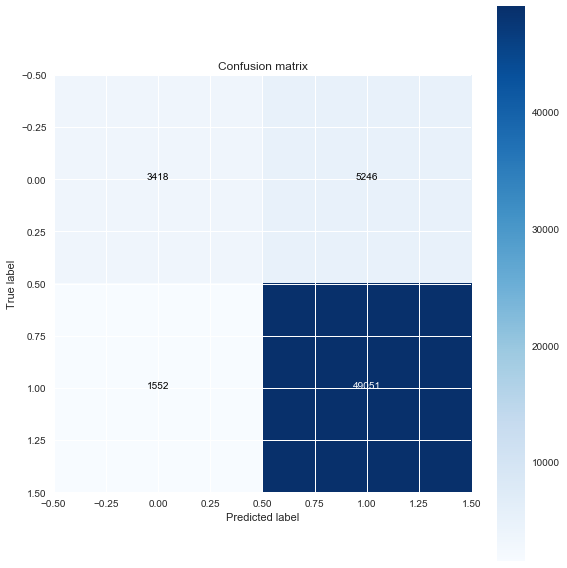

In [105]:
fig = plt.figure(figsize=(8,8))
cm6 = confusion_matrix(y_test, random.predict(X_test))
plot_confusion_matrix(cm6);

### Perceptron

Confusion matrix, without normalization
[[ 3951  4713]
 [ 5049 45554]]


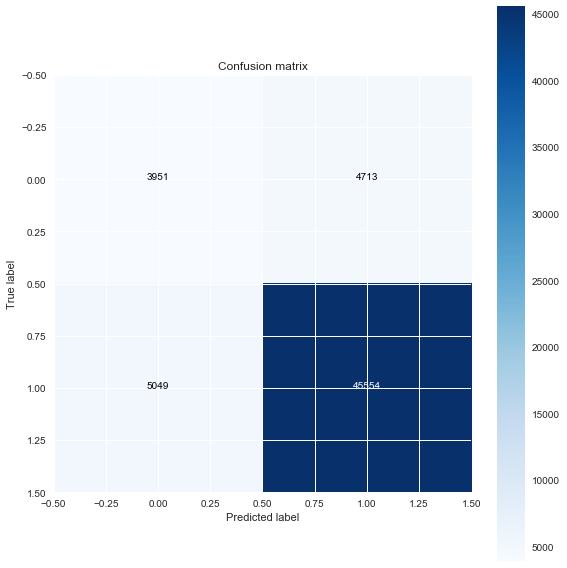

In [106]:
fig = plt.figure(figsize=(8,8))
cm7 = confusion_matrix(y_test, per.predict(X_test))
plot_confusion_matrix(cm7);